In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline 


In [2]:
df_31310 = pd.read_csv('./31310.csv', index_col='id')
df_32788 = pd.read_csv('./32788.csv', index_col='id')
df_33243 = pd.read_csv('./33243.csv', index_col='id')
df_33314 = pd.read_csv('./33314.csv', index_col='id')
df_39142 = pd.read_csv('./39142.csv', index_col='id')
df_48317 = pd.read_csv('./48317.csv', index_col='id')


In [24]:
df = df_31310.merge(df_32788,how='left',suffixes=('_31310','_32788'), left_index=True, right_index=True)
df = df.merge(df_33243,how='left',suffixes=('','_33243'), left_index=True,right_index=True)
df = df.merge(df_33314,how='left',suffixes=('','_33314'),left_index=True,right_index=True)
# df = df_33314.merge(df_33243,how='left',suffixes=('','_33778'),left_index=True,right_index=True)

In [45]:
y_test = df.mean(axis=1)
df.columns

Index([u'price_doc_31310', u'price_doc_32788', u'price_doc',
       u'price_doc_33314'],
      dtype='object')

In [48]:
# df_no_red = df.drop(['price_doc'],axis=1)

y_test2 = df_no_red.mean(axis=1)

In [49]:
sample = pd.read_csv('./sample_submission.csv', index_col='id')
sample['price_doc'] = y_test2

sample.to_csv('./mean_submission_052817_nored.csv')

In [50]:
sample

,price_doc
id,
30474,5.485453e+06
30475,7.993243e+06
30476,5.536350e+06
30477,5.897009e+06
30478,5.040120e+06
30479,8.842203e+06
30480,4.329884e+06
30481,4.169262e+06
30482,4.640420e+06


In [4]:
df_31310['score'] = 31310
df_32788['score'] = 32788
df_33243['score'] = 33243
df_33314['score'] = 33314
df_39142['score'] = 39142
df_48317['score'] = 48317



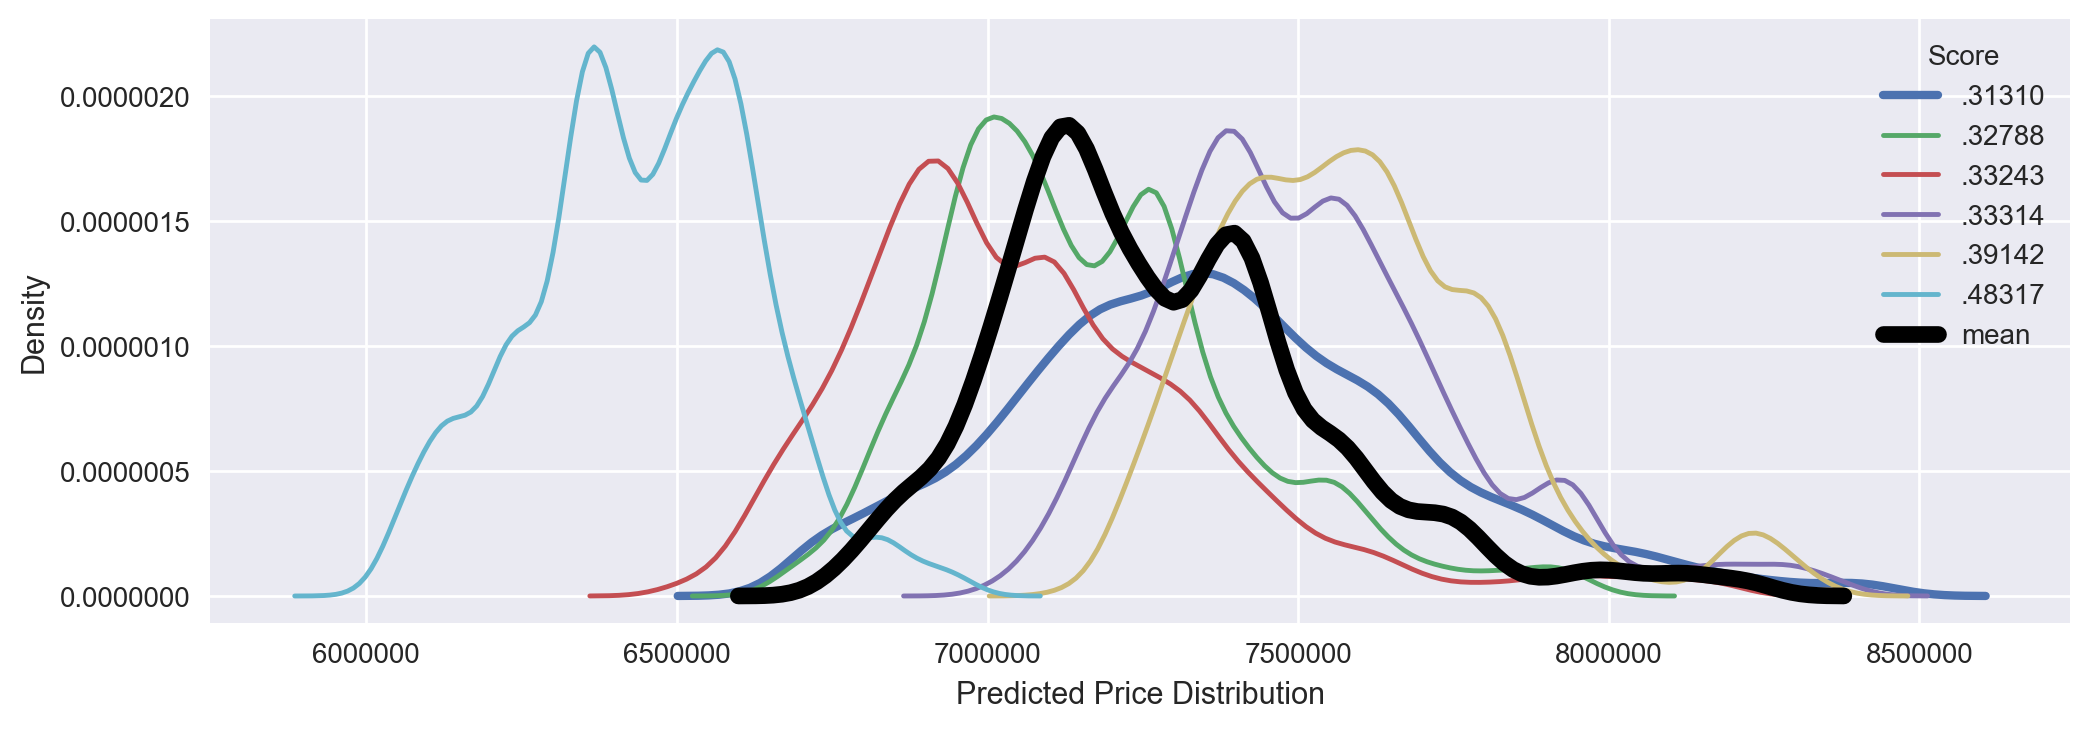

In [41]:
plt.figure(figsize=(12,4),dpi=200)
sns.kdeplot(df_31310['price_doc'].rolling(window=300).mean(), label='.31310',lw=3)
sns.kdeplot(df_32788['price_doc'].rolling(window=300).mean(), label='.32788')
sns.kdeplot(df_33243['price_doc'].rolling(window=300).mean(), label='.33243')
sns.kdeplot(df_33314['price_doc'].rolling(window=300).mean(), label='.33314')
sns.kdeplot(df_39142['price_doc'].rolling(window=300).mean(), label='.39142')
sns.kdeplot(df_48317['price_doc'].rolling(window=300).mean(), label='.48317')
sns.kdeplot(y_test.rolling(window=300).mean(), label='mean', color='black', lw=6)
plt.xlabel('Predicted Price Distribution')
plt.ylabel('Density')
plt.legend(title='Score')
plt.show()

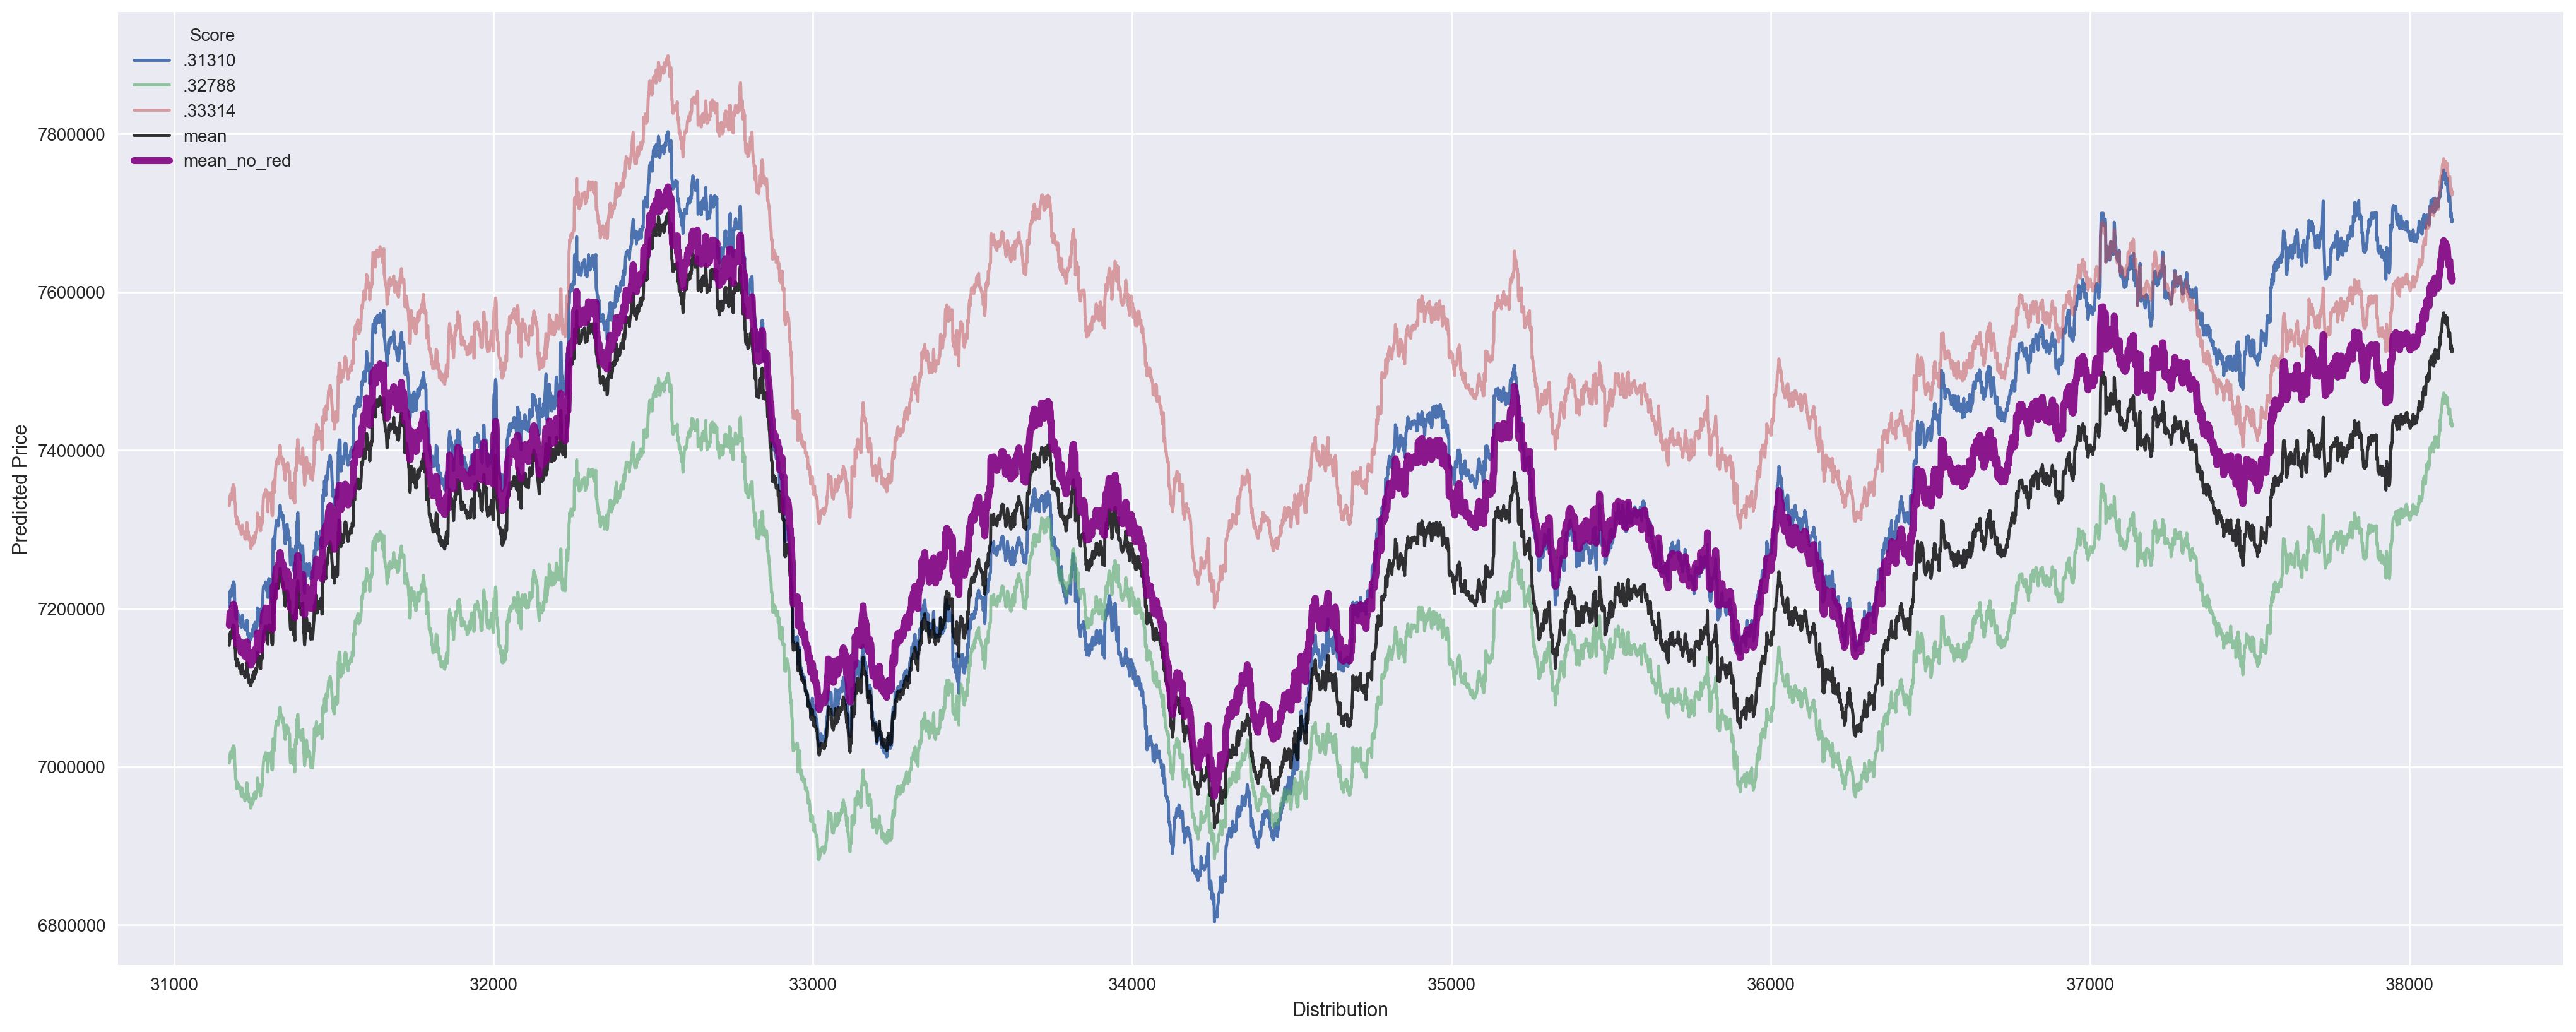

In [56]:
plt.figure(figsize=(25,10),dpi=200)
plt.plot(df_31310['price_doc'].rolling(window=700).mean(), label='.31310', alpha =1.0)
plt.plot(df_32788['price_doc'].rolling(window=700).mean(), label='.32788', alpha =0.6)
# plt.plot(df_33243['price_doc'].rolling(window=700).mean(), label='.33243', alpha =0.5)
plt.plot(df_33314['price_doc'].rolling(window=700).mean(), label='.33314', alpha =0.5)
# plt.plot(df_39142['price_doc'].rolling(window=700).mean(), label='.39142', alpha =0.3)
# plt.plot(df_48317['price_doc'].rolling(window=700).mean(), label='.48317', alpha =0.1)
plt.plot(y_test.rolling(window=700).mean(), label='mean', alpha =0.8, color='black')
plt.plot(y_test2.rolling(window=700).mean(), label='mean_no_red', alpha =0.9, color='purple', lw=4)
plt.xlabel('Distribution')
plt.ylabel('Predicted Price')
plt.legend(title='Score')
plt.show()

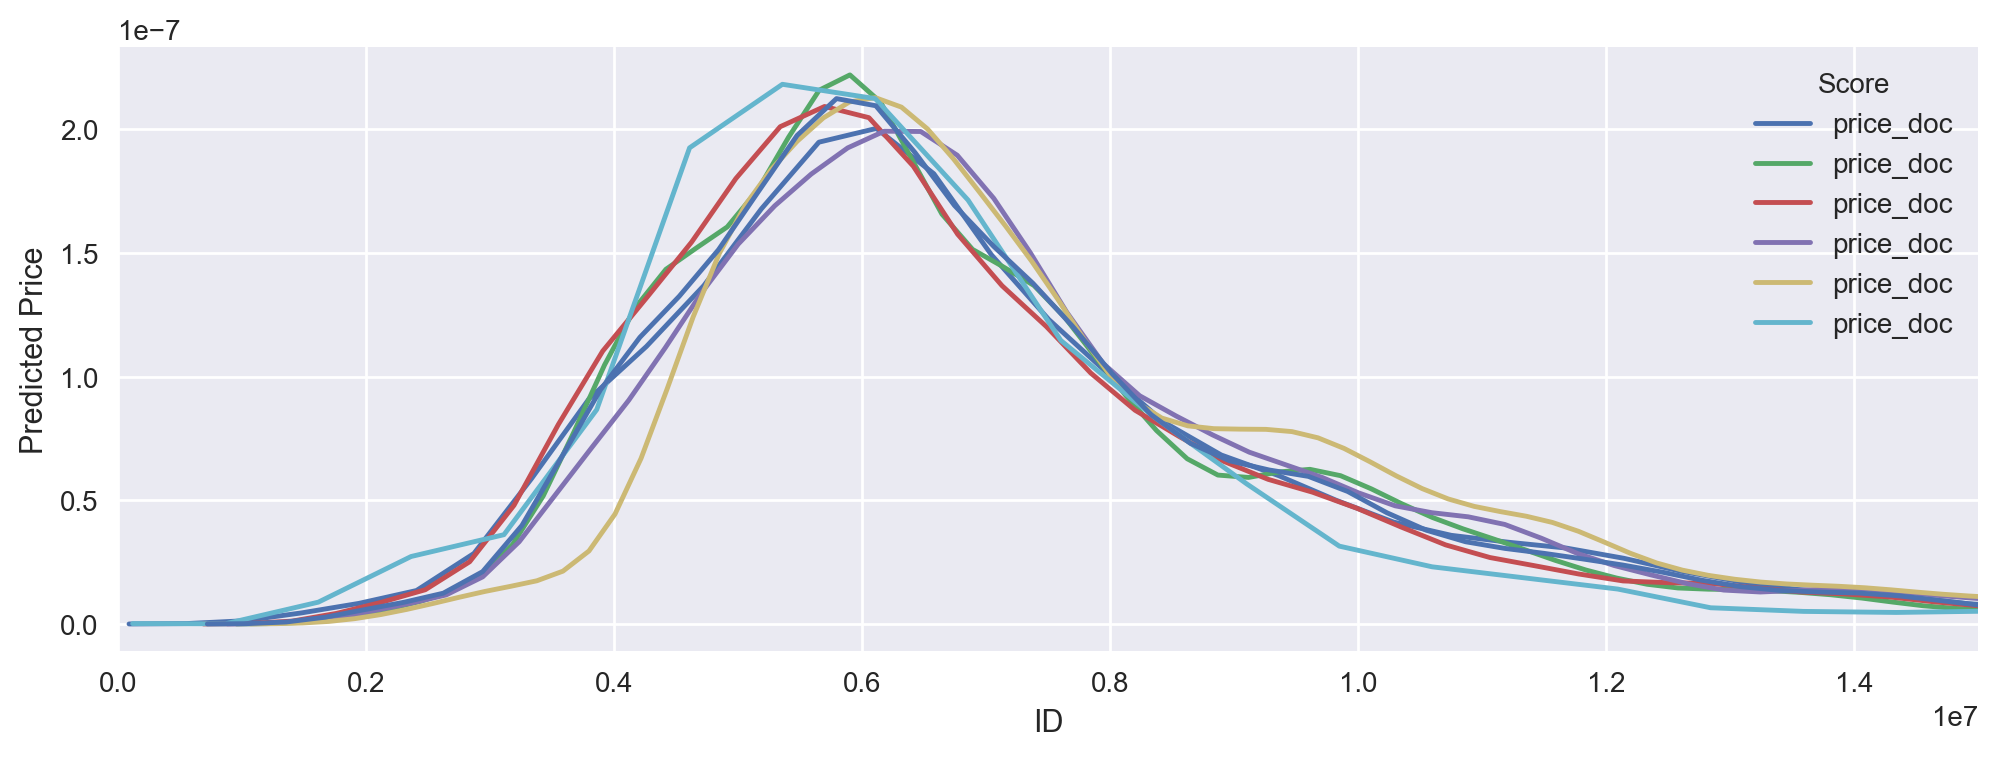

In [29]:
plt.figure(figsize=(12,4),dpi=200)
sns.kdeplot(df_31310['price_doc'])
sns.kdeplot(df_32788['price_doc'])
sns.kdeplot(df_33243['price_doc'])
sns.kdeplot(df_33314['price_doc'])
sns.kdeplot(df_39142['price_doc'])
sns.kdeplot(df_48317['price_doc'])
sns.kdeplot(y_test)
plt.xlabel('ID')
plt.ylabel('Predicted Price')
plt.xlim((0,1.5e7))
plt.legend(title='Score')
plt.show()

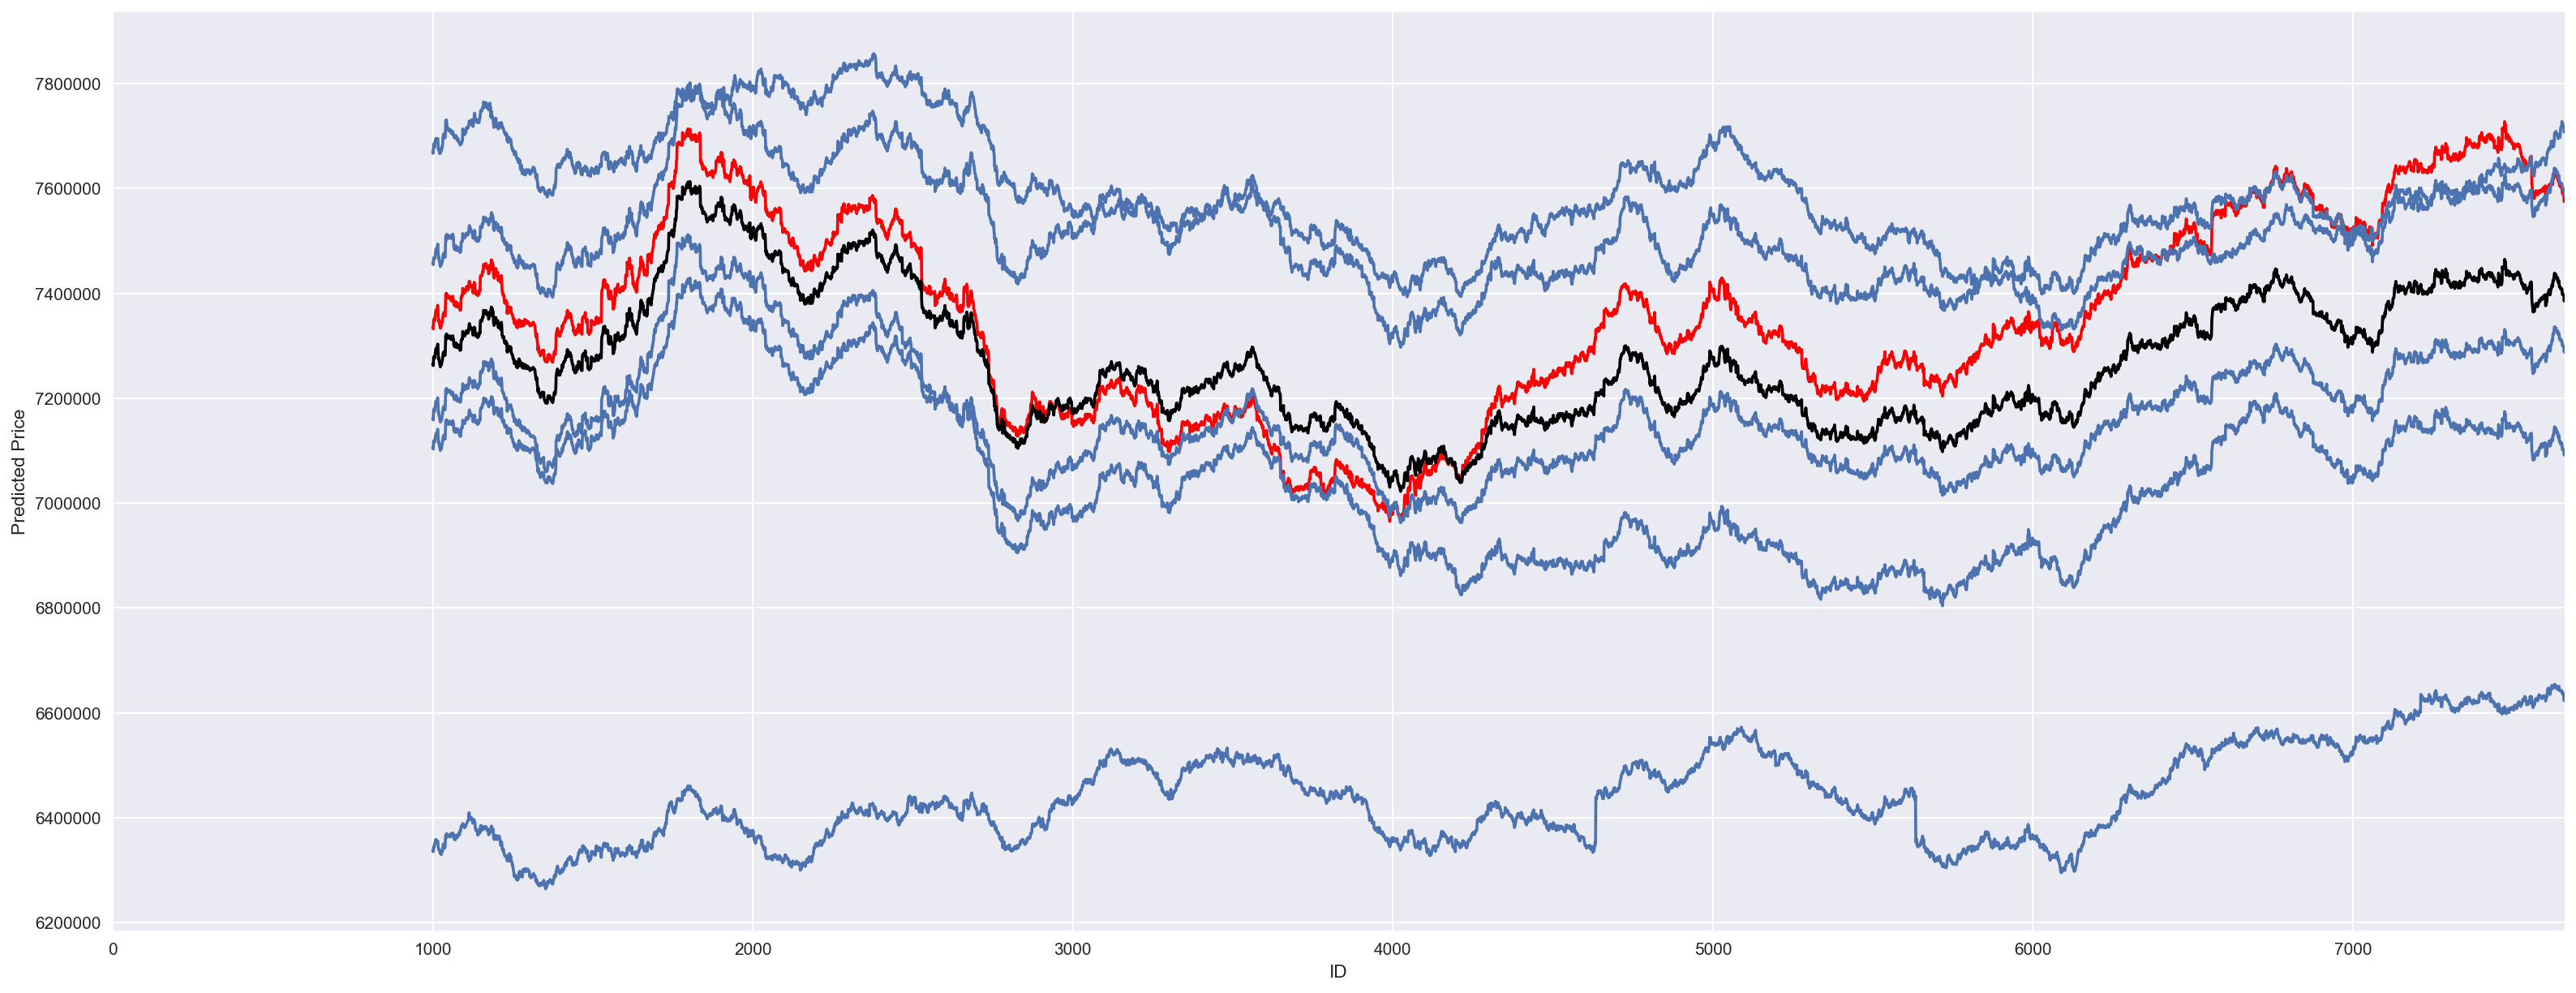

In [38]:
plt.figure(figsize=(26,10),dpi=150)
sns.tsplot(df_31310['price_doc'].rolling(window=1000).mean(), color='red')
sns.tsplot(df_32788['price_doc'].rolling(window=1000).mean())
sns.tsplot(df_33243['price_doc'].rolling(window=1000).mean())
sns.tsplot(df_33314['price_doc'].rolling(window=1000).mean())
sns.tsplot(df_39142['price_doc'].rolling(window=1000).mean())
sns.tsplot(df_48317['price_doc'].rolling(window=1000).mean())
sns.tsplot(y_test.rolling(window=1000).mean(), color='black') 
plt.xlabel('ID')
plt.ylabel('Predicted Price')
plt.legend(title='Score')
plt.show()